
**Aim:** Download the any dataset from UCI or Data.org or from any other data
repositories and Implement Single and multilayer perceptron on a dataset.


The Superconductivity Dataset contains 81 features describing the properties of different materials. The goal is to predict the critical temperature (Tc) at which a material becomes superconducting.
Total Features: 81 (All numerical)
Target Variable (critical_temp)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

In [3]:

file_path = "C:/Users/gayat/SEM 6/ml lab/train.csv"
df = pd.read_csv(file_path)

df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [15]:
print(f"Number of samples in dataset: {df.shape[0]}")

Number of samples in dataset: 21263


In [16]:

print("Missing Values:\n", df.isnull().sum())

print(f"Number of duplicate rows: {df.duplicated().sum()}")

Missing Values:
 number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64
Number of duplicate rows: 66


In [ ]:

X = df.drop('critical_temp', axis=1)  
y = df['critical_temp']  

In [ ]:
# Standardize features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
y_train_scaled, y_test_scaled = train_test_split(y_scaled, test_size=0.2, random_state=42)


In [ ]:
# Convert Regression Target to Binary for Classification
y_train_class = (y_train > y_train.median()).astype(int)
y_test_class = (y_test > y_train.median()).astype(int)

# Step 3: Implement MLP Classifier (Binary Classification)
classifier = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=2000,  
    random_state=42
   
)
classifier.fit(X_train, y_train_class)
y_pred_classifier = classifier.predict(X_test)

In [8]:
# Classification Metrics
accuracy_classifier = accuracy_score(y_test_class, y_pred_classifier) * 100
print(f"MLP Classifier Accuracy: {accuracy_classifier:.2f}%")
print("Classification Report:\n", classification_report(y_test_class, y_pred_classifier))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_classifier))

MLP Classifier Accuracy: 92.92%
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2163
           1       0.91      0.95      0.93      2090

    accuracy                           0.93      4253
   macro avg       0.93      0.93      0.93      4253
weighted avg       0.93      0.93      0.93      4253

Confusion Matrix:
 [[1967  196]
 [ 105 1985]]


In [12]:
# Step 4: Implement MLP Regressor (Regression)
regressor = MLPRegressor(
    hidden_layer_sizes=(100, 50), 
    activation='tanh',  
    solver='adam',
    learning_rate='adaptive',
    max_iter=2000, 
    random_state=42

)
regressor.fit(X_train, y_train_scaled)
y_pred_regressor_scaled = regressor.predict(X_test)


In [13]:

y_pred_regressor = scaler_y.inverse_transform(y_pred_regressor_scaled.reshape(-1, 1)).ravel()

mse_regressor = mean_squared_error(y_test, y_pred_regressor)
print(f"MLP Regressor Mean Squared Error: {mse_regressor:.4f}")

MLP Regressor Mean Squared Error: 117.6643


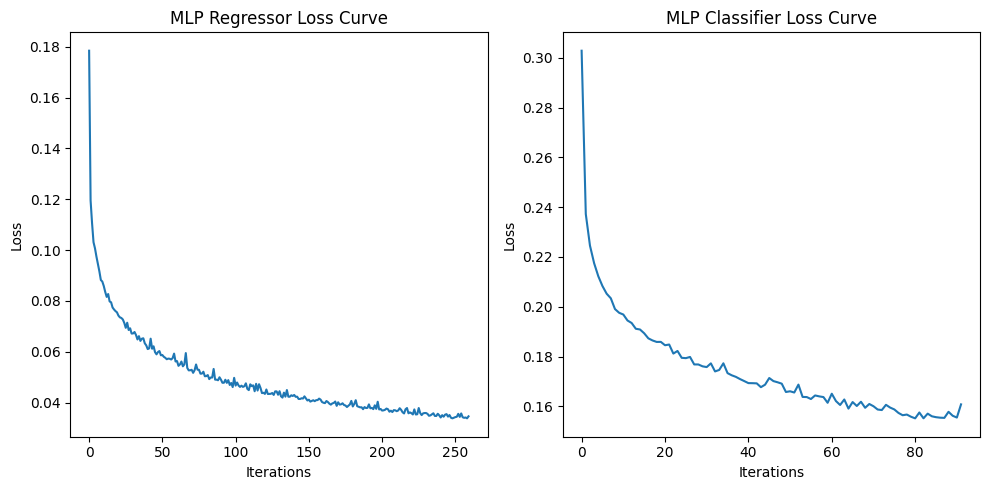

In [14]:
#  Plot Loss Curves
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(regressor.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Regressor Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(classifier.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Classifier Loss Curve')

plt.tight_layout()
plt.show()
